<h1><center>pyinmac demo</center></h1>

    # Python code that runs on server to get /var usage and push to DB
    import sys
    from pyinmac import connect_inmac_db, get_time, add_data

    n = len(sys.argv)
    if n != 3:
        sys.stderr.write('Usage: {0} used avail\n'.format(sys.argv[0]))
        sys.exit(1)
    used = float(sys.argv[1])
    avail = float(sys.argv[2])

    db = connect_inmac_db('private', 'cron', 'xxxxxxxx')   # password xxxxxxxx
    add_data(db, 'private_server', get_time(), used/avail, '/var usage')


In [1]:
# Import modules
from datetime import datetime
from pyinmac import connect_inmac_db, get_data

In [2]:
# Use pyinmac functions to connect to DB and get ALL data for the specified metric
db = connect_inmac_db('private', 'demo', 'F*8o83d^3rF6Zw&')
t, u = get_data(db, 'private_server', '/var usage')

In [4]:
# Look at data
u

['0.03737283555675211',
 '0.03744047980671922',
 '0.03744599955604378',
 '0.0374357303019887',
 '0.037455498797050756',
 '0.03749888943416949',
 '0.03749234209369355',
 '0.037546520613852455',
 '0.037500044855772914',
 '0.0375323977055402',
 '0.03754010106241133',
 '0.0375481897102393',
 '0.03759441297448421',
 '0.037525208008997606',
 '0.03754960202676106',
 '0.03757130082755613',
 '0.03758157276574091',
 '0.03759389936003275',
 '0.03757990356194626',
 '0.03759826509907815',
 '0.03762330460613995',
 '0.0376320366158777',
 '0.037613930700433264',
 '0.03763075248758143',
 '0.037929269390198084',
 '0.0379318391279132',
 '0.03793993388488681',
 '0.03766272822792533',
 '0.03766825034247521',
 '0.03767634098853428',
 '0.037684303334817655',
 '0.03770343915059061',
 '0.03770485188979713',
 '0.037722704107554184',
 '0.037704338166004235',
 '0.03771050288508974',
 '0.03773567624822052',
 '0.03773619000304222',
 '0.03774415326782808',
 '0.03775918105205077',
 '0.037763933518842115',
 '0.0377837

In [10]:
# Convert string data to float
y = [float(s) for s in u]

In [6]:
# Import plotting module
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


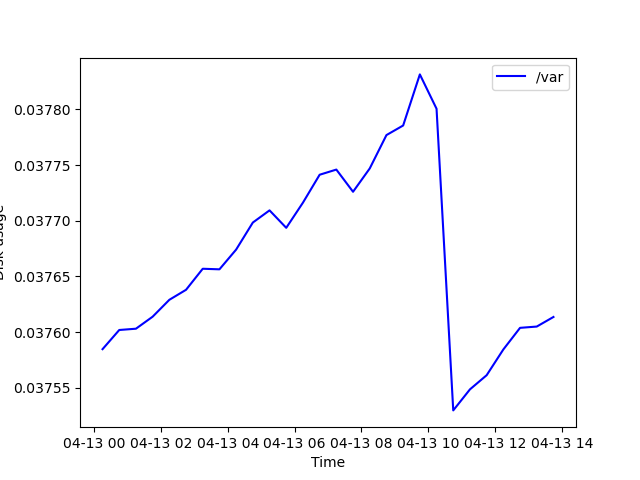

In [11]:
# Create and display plot
fig, ax = plt.subplots()
ax.plot(t, y, linestyle='-', color='blue',  label='/var')
ax.set_xlabel('Time')
ax.set_ylabel('Disk usage')
ax.legend()

In [8]:
# Create a datetime object 
t0 = datetime(2021, 4, 13, 0, 0, 0)

In [9]:
# Get only the data for the specified metric with time after t0
t, u = get_data(db, 'private_server', '/var usage', where='Time > "{0}"'.format(t0))

     # Python code that runs on server to get cpu usage and push to DB
    from psutil import cpu_percent
    from pyinmac import connect_inmac_db, get_time, add_data

    db = connect_inmac_db('private', 'cron', 'xxxxxxxx')  # password xxxxxxxx
    pct = cpu_percent(interval=1)
    add_data(db, 'private_server', get_time(), pct, 'cpu usage')


In [12]:
# Get another metric with time after t0
t, c = get_data(db, 'private_server', 'cpu usage', where='Time > "{0}"'.format(t0))

In [13]:
# Convert string data to float
y = [float(s) for s in c]

<IPython.core.display.Javascript object>


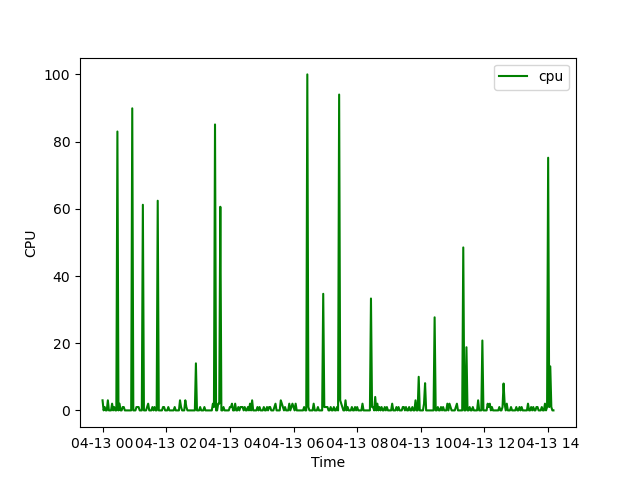

In [14]:
# Create and display plot
fig, ax = plt.subplots()
ax.plot(t, y, linestyle='-', color='green',  label='cpu')
ax.set_xlabel('Time')
ax.set_ylabel('CPU')
ax.legend()